In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
dataset = read_csv('sales.csv')
pyplot.show()

autocorrelation_plot(series)
pyplot.show()
my_data=dataset['Sales']
my_data.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Sales, dtype: float64

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


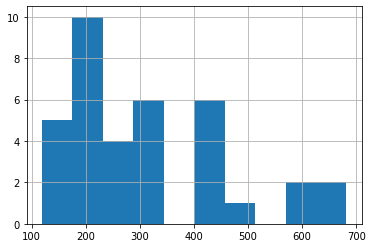

In [3]:
#Dickey Fuller Test

my_data.hist()
from statsmodels.tsa.stattools import adfuller
result = adfuller(my_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


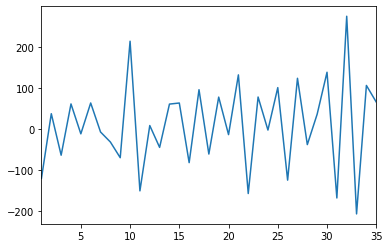

In [4]:
dataset['sales_diff'] = dataset['Sales'] - dataset['Sales'].shift(1)
kdata = dataset['sales_diff'].dropna()
kdata.plot()

from statsmodels.tsa.stattools import adfuller
#X = series.values
result = adfuller(kdata)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#kdata.hist()
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# plot_acf(series)
# pyplot.show()

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(series, lags=50)
# pyplot.show()

In [13]:
# fit model
model = ARIMA(kdata, order=(4,1,0))
model_fit = model.fit()
#print(model_fit.summary())


In [14]:
# plot residual errors
#residuals = DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()
#residuals.plot(kind='kde')
#pyplot.show()
#print(residuals.describe())

predicted=0.022772, expected=-2.600000
predicted=75.875569, expected=100.700000
predicted=-60.981714, expected=-124.500000
predicted=77.801784, expected=123.400000
predicted=-60.424700, expected=-38.000000
predicted=96.315474, expected=36.100000
predicted=-16.149297, expected=138.100000
predicted=-70.300326, expected=-167.900000
predicted=163.027759, expected=274.400000
predicted=-152.045461, expected=-206.700000
predicted=245.449629, expected=106.000000
predicted=32.688736, expected=65.600000
Test MSE: 6675.372


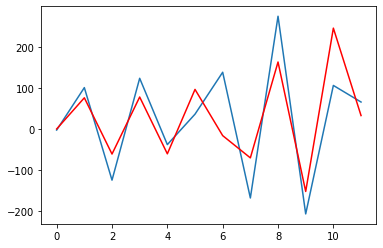

In [16]:
X = kdata.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    #print(output)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [18]:
ARIMA(series, order=(5,1,0))